In [2]:
import pandas as pd
import numpy as np
# Setting up Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [6]:
# Setting up Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [177]:
# Reading in the dataset
df = pd.read_csv('/content/drive/MyDrive/CloudComputing/merged.csv')


## **Data Preprocessing**

In [178]:
df[["Date","Body"]]

,Date,Body
0,2020-11-02,Hi
1,2020-11-02,early bird gets the worm
2,2020-11-02,My body is ready
3,2020-11-02,Awww yeah another week another dollar
4,2020-11-02,Flair me bitches
...,...,...
1520772,2021-01-29,&gt;f you cannot buy more GME shares and have ...
1520773,2021-01-29,RIP GME paperhands lol
1520774,2021-01-29,Yes
1520775,2021-01-29,$SLV 🚀🚀🚀🏦🔫


In [179]:
# Resetting Date Index
df["Date2"] = pd.to_datetime(df["Date"])

In [180]:
s =  df.set_index('Date2').resample('D')


In [181]:
# Splitting each entry of the body into a list of strings
str(df["Body"][1]).split()

['early', 'bird', 'gets', 'the', 'worm']

In [182]:
# Defining a split function to apply to the entire series in the dataframe
def split(somestring):
  return str(somestring).split()

In [183]:
# Applying split
df["Split"] = df["Body"].apply(split)

In [184]:
df

,Unnamed: 0,Unnamed: 0.1,Date,Time,Body,Date2,Split
0,0,0,2020-11-02,1604312191,Hi,2020-11-02,[Hi]
1,1,1,2020-11-02,1604312199,early bird gets the worm,2020-11-02,"[early, bird, gets, the, worm]"
2,2,2,2020-11-02,1604312211,My body is ready,2020-11-02,"[My, body, is, ready]"
3,3,3,2020-11-02,1604312221,Awww yeah another week another dollar,2020-11-02,"[Awww, yeah, another, week, another, dollar]"
4,4,4,2020-11-02,1604312234,Flair me bitches,2020-11-02,"[Flair, me, bitches]"
...,...,...,...,...,...,...,...
1520772,553480,700123,2021-01-29,1611931707,&gt;f you cannot buy more GME shares and have ...,2021-01-29,"[&gt;f, you, cannot, buy, more, GME, shares, a..."
1520773,553481,700125,2021-01-29,1611931707,RIP GME paperhands lol,2021-01-29,"[RIP, GME, paperhands, lol]"
1520774,553482,700128,2021-01-29,1611931707,Yes,2021-01-29,[Yes]
1520775,553483,700134,2021-01-29,1611931707,$SLV 🚀🚀🚀🏦🔫,2021-01-29,"[$SLV, 🚀🚀🚀🏦🔫]"


In [185]:
dailydf = df[["Date2","Split"]]

In [186]:
dailydf

,Date2,Split
0,2020-11-02,[Hi]
1,2020-11-02,"[early, bird, gets, the, worm]"
2,2020-11-02,"[My, body, is, ready]"
3,2020-11-02,"[Awww, yeah, another, week, another, dollar]"
4,2020-11-02,"[Flair, me, bitches]"
...,...,...
1520772,2021-01-29,"[&gt;f, you, cannot, buy, more, GME, shares, a..."
1520773,2021-01-29,"[RIP, GME, paperhands, lol]"
1520774,2021-01-29,[Yes]
1520775,2021-01-29,"[$SLV, 🚀🚀🚀🏦🔫]"


In [ ]:
# Combining list of words that appear by date
combined = dailydf.groupby([dailydf.Date2]).Split.apply(sum)

In [ ]:
# Converting back to string so it is more easily readable, and then exporting
new_combined = pd.DataFrame()
new_combined["Split"] = [' '.join(x) for x in combined]

In [ ]:
combined.index

In [ ]:
new_combined["Date"] = list(combined.index)

In [ ]:
new_combined

In [ ]:
new_combined.to_csv("/content/drive/MyDrive/CloudComputing/combined.csv")

# Data Exploration: Counting Word Frequency

In [11]:
df = pd.read_csv("combined.csv")

In [12]:
# Defining a split function to apply to the entire series in the dataframe
def split(somestring):
  return str(somestring).split()

In [13]:
# Applying split
# import re
df["Words"] = df["Split"].apply(split)

In [14]:
for j in range(len(df)):
  df["Words"][j] = [i for i in df["Words"][j] if i.isalpha()]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df = df.drop("Split",axis=1)
df = df.drop("Unnamed: 0",axis=1)


In [16]:
df

,Date,Words
0,2020-11-02,"[Hi, early, bird, gets, the, worm, My, body, i..."
1,2020-11-03,"[Green, Erection, time, And, For, First, mofos..."
2,2020-11-04,"[Bears, r, fuk, First, Stonks, go, Biden, Look..."
3,2020-11-09,"[first, second, First, at, sucking, DICK, Hope..."
4,2020-11-10,"[Tech, come, back, The, time, has, come, again..."
5,2020-11-11,"[first, First, L, Third, Fuck, you, Yesterday,..."
6,2020-11-12,"[The, casino, is, open, First, comment, means,..."
7,2020-11-13,"[You, never, forget, believe, someone, told, t..."
8,2020-11-16,"[first, Welcome, to, the, baba, booeys, club, ..."
9,2020-11-17,"[Fourth, fucking, send, it, snap, First, let, ..."


In [17]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
s=set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Calvin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
df["Words"][0] = [x.lower() for x in df["Words"][0]]
filtered_sentence = [w for w in df["Words"][0] if not w in s] 

In [24]:
dec01 = pd.Series(filtered_sentence).value_counts()

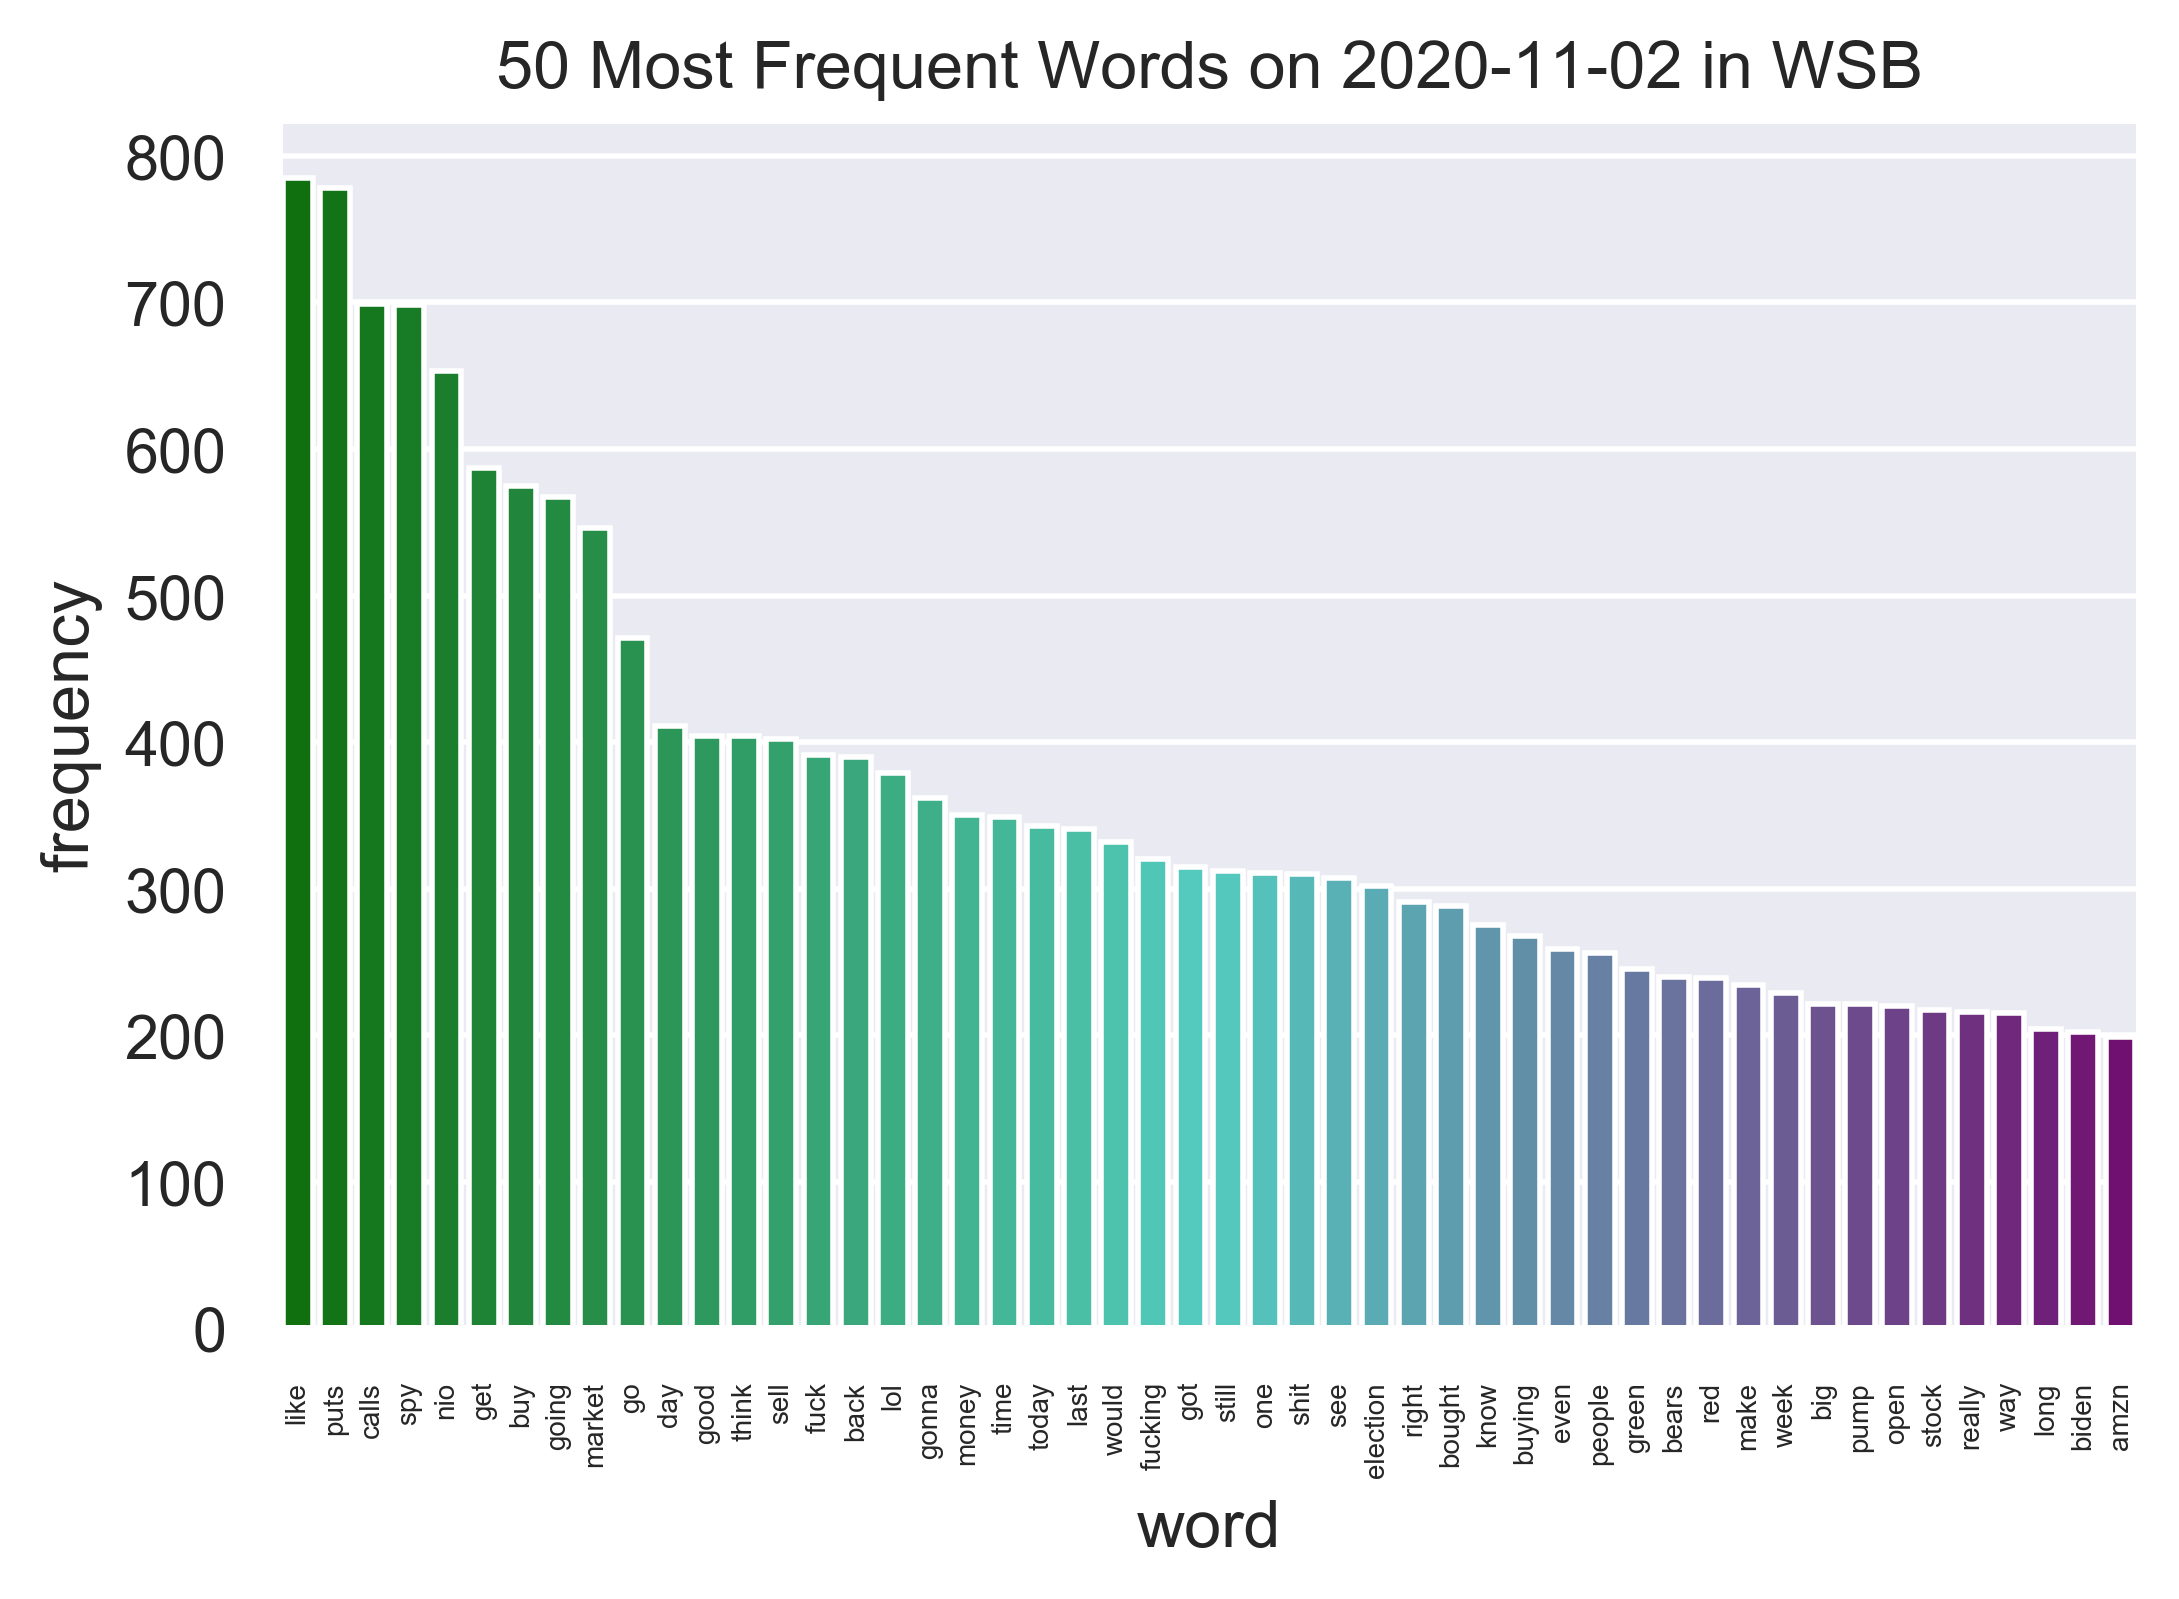

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 400

# sns.color_palette("mako", as_cmap=True)
# mypal = sns.color_palette("crest", n_colors=50)

sns.set()
cmap = sns.blend_palette(["green", "turquoise","purple"], 50)
sns.set_palette(cmap, n_colors=50)

data = pd.DataFrame({'word':dec01.keys()[:50],'frequency':list(dec01)[:50]})
g = sns.barplot(x = 'word', y = 'frequency', data = data, palette=cmap)
plt.xticks(rotation=90, size = 5)
plt.title("50 Most Frequent Words on 2020-11-02 in WSB")
plt.show()

In [ ]:
tdf1 = pd.DataFrame(dec01)

In [ ]:
df["Words"][1] = [x.lower() for x in df["Words"][1]]
filtered_sentence = [w for w in df["Words"][1] if not w in s] 
dec02 = pd.Series(filtered_sentence).value_counts()

In [ ]:
tdf2 = pd.DataFrame(dec02)

In [ ]:
tdf1

In [ ]:
test = pd.concat([tdf1,tdf2], axis=1)
test

In [ ]:
# df.columns = ['a', 'b']
df_list = []
# Iterating through the 30 days
for i in range(len(df["Words"])):
  df["Words"][i] = [x.lower() for x in df["Words"][i]]
  filtered_sentence = [w for w in df["Words"][i] if not w in s] 
  dec01 = pd.Series(filtered_sentence).value_counts()
  df_list.append(dec01)

In [ ]:
decDF = pd.concat(df_list, axis=1)

In [ ]:
decDF.columns= df["Date"]

In [ ]:
decDF.name = "Word"

In [ ]:
decDF.index.names = ['Word']

In [ ]:
# Renaming Index
decDF.rename_axis(None, axis=1).rename_axis('Word', axis=0)


In [ ]:
decDF.to_csv("/content/drive/MyDrive/CloudComputing/3monthDF.csv")

# Data Exploration: Visualizing Word Frequency

In [ ]:
# Setting up Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 400

In [8]:
df = pd.read_csv("3monthDF.csv")

In [9]:
df

,Word,2020-11-02,2020-11-03,2020-11-04,2020-11-09,2020-11-10,2020-11-11,2020-11-12,2020-11-13,2020-11-16,...,2021-01-14,2021-01-15,2021-01-18,2021-01-19,2021-01-20,2021-01-21,2021-01-22,2021-01-27,2021-01-28,2021-01-29
0,like,785.0,952.0,858.0,1406.0,1050.0,839.0,1073.0,1312.0,1030.0,...,1886.0,2117.0,752.0,1236.0,1268.0,1231.0,1554.0,1565.0,1453.0,1530.0
1,puts,778.0,726.0,635.0,838.0,714.0,543.0,871.0,970.0,800.0,...,485.0,451.0,110.0,206.0,282.0,280.0,292.0,72.0,60.0,89.0
2,calls,699.0,744.0,850.0,1617.0,906.0,791.0,952.0,1184.0,1063.0,...,1789.0,1758.0,276.0,931.0,1116.0,1083.0,1279.0,422.0,204.0,205.0
3,spy,698.0,653.0,551.0,926.0,483.0,369.0,654.0,750.0,602.0,...,359.0,365.0,39.0,164.0,382.0,217.0,178.0,100.0,45.0,72.0
4,nio,653.0,399.0,939.0,1075.0,1076.0,1202.0,2807.0,4280.0,1702.0,...,217.0,288.0,38.0,131.0,122.0,95.0,216.0,34.0,12.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89382,expremely,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
89383,anly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
89384,niiiiceeeeee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
89385,disablement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


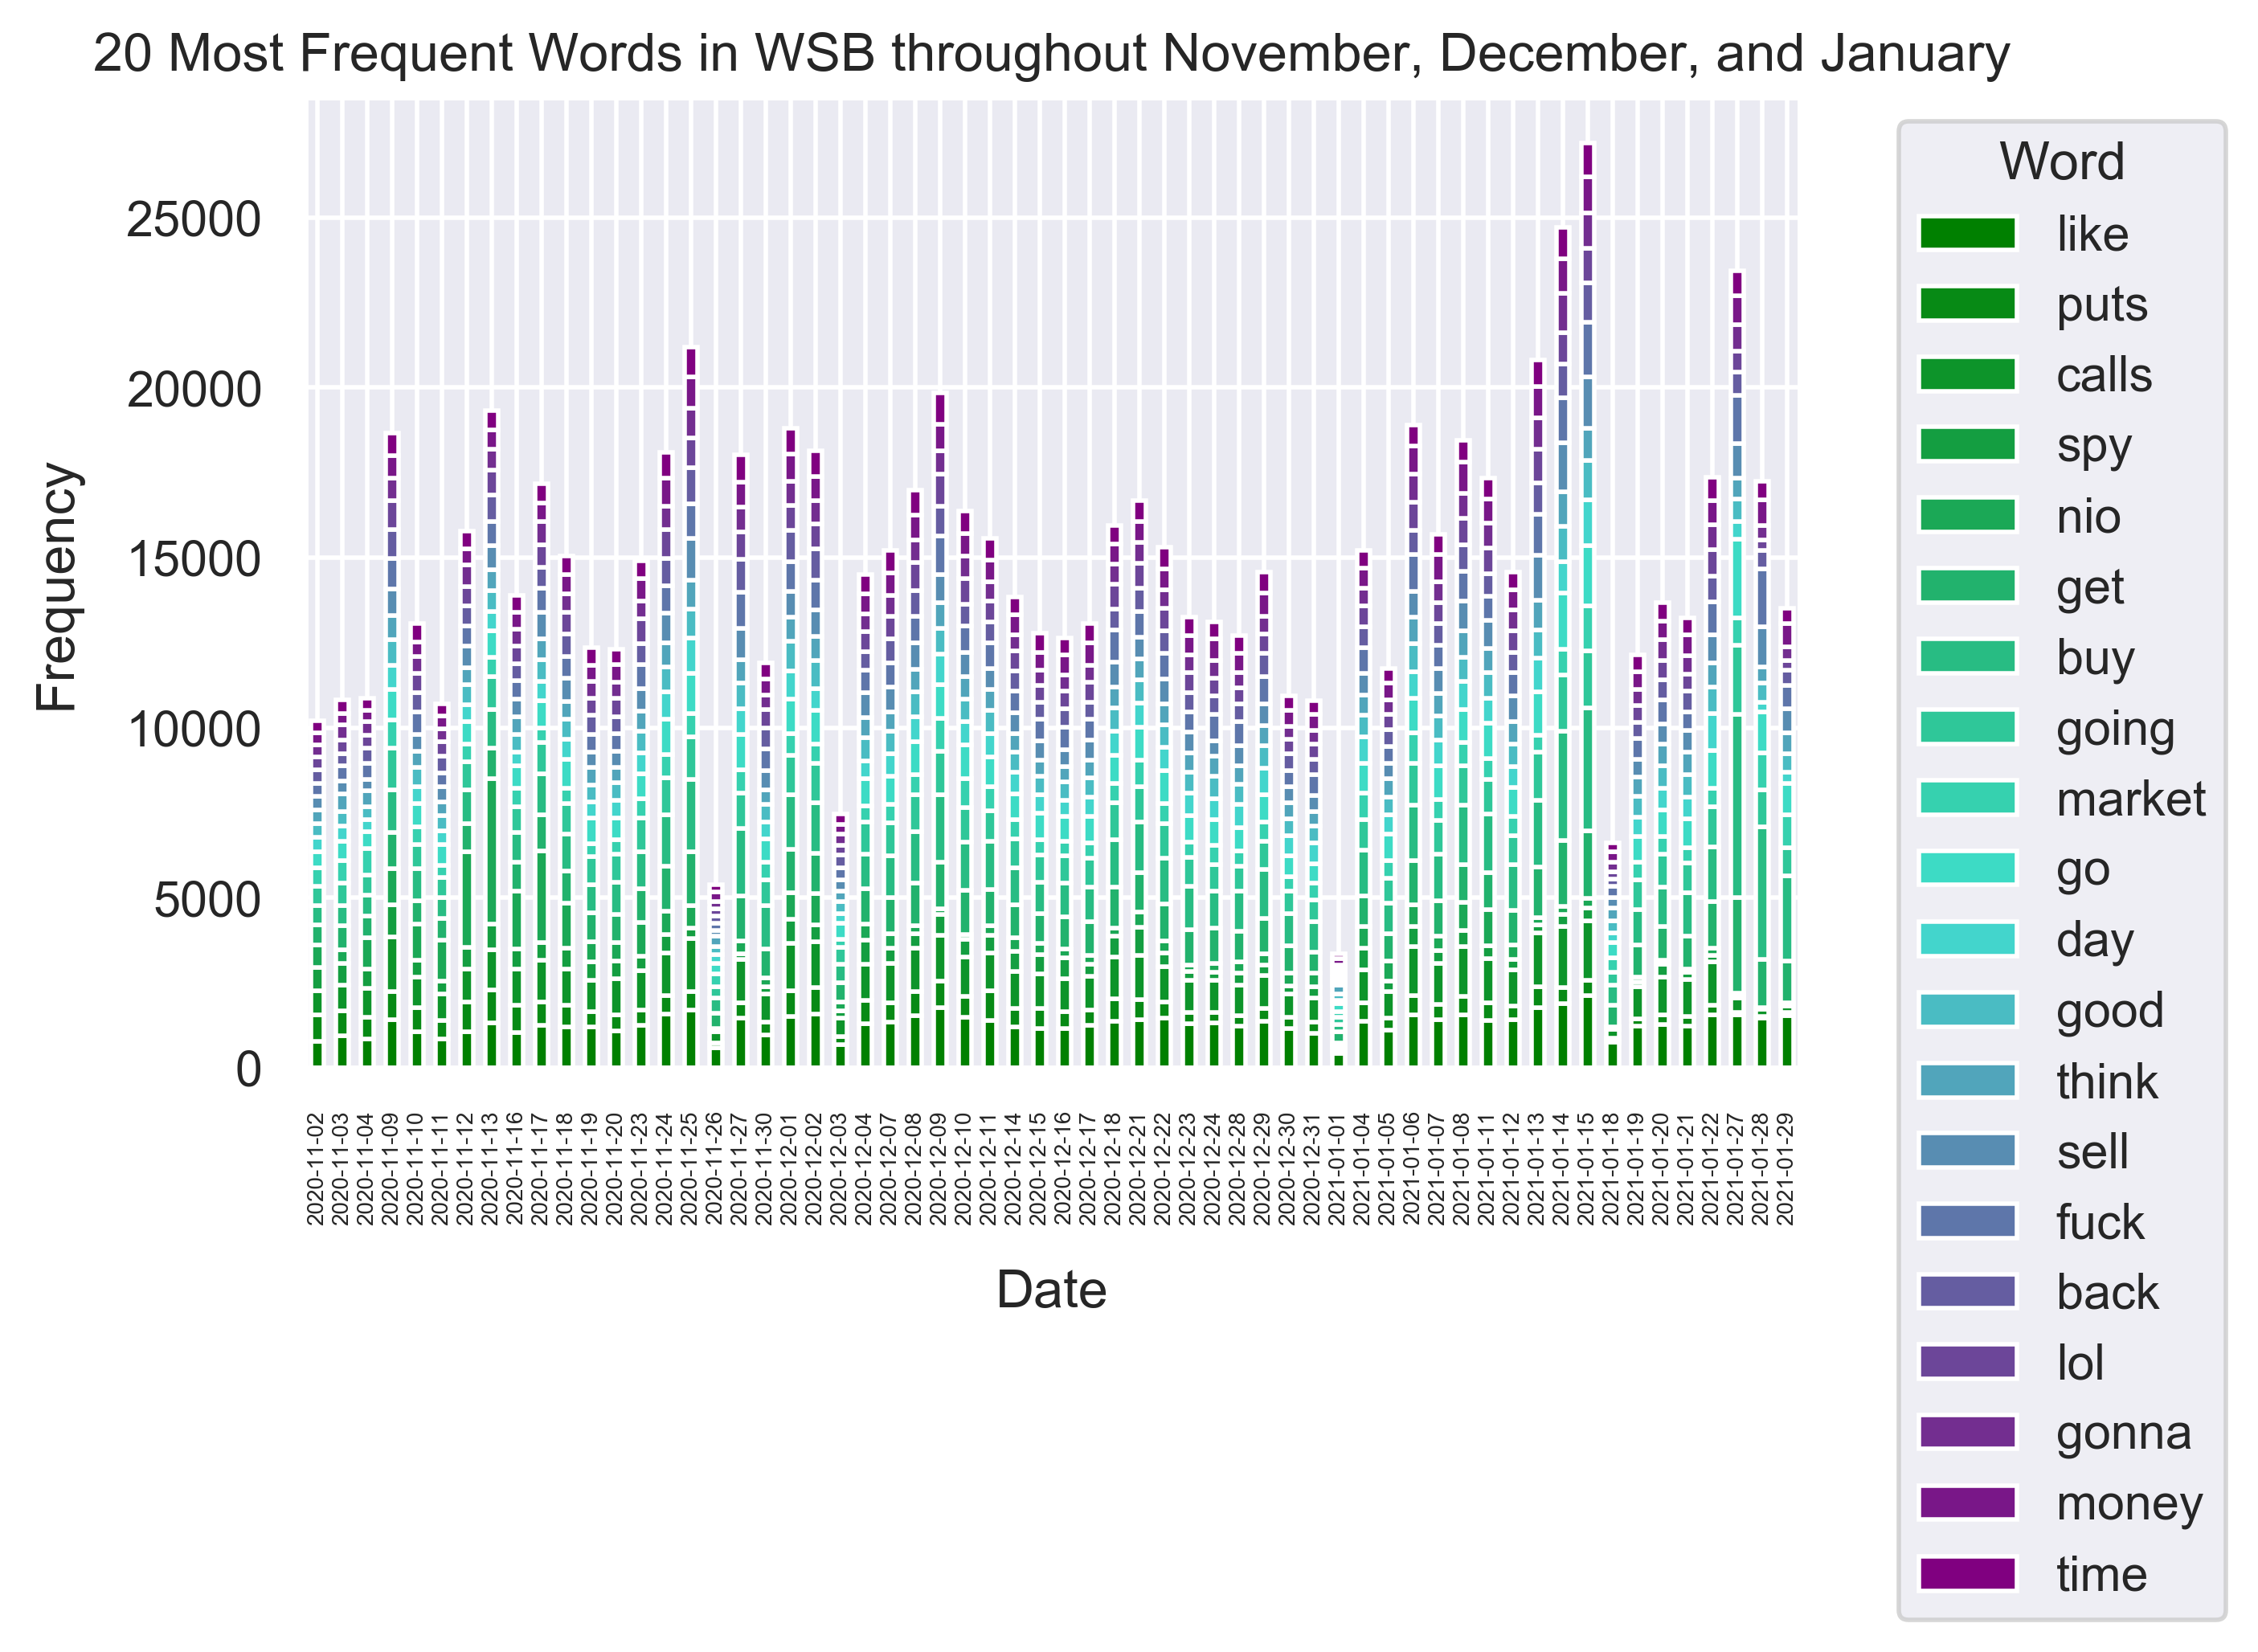

In [10]:
sns.set()
cmap = sns.blend_palette(["green", "turquoise","purple"], 20)
sns.set_palette(cmap, n_colors=20)


fig = df[:20].set_index('Word').T.plot(kind='bar',stacked=True)
ax = plt.subplot()
ax.legend(bbox_to_anchor=(1.05, 1), title="Word")
plt.title("20 Most Frequent Words in WSB throughout November, December, and January")
plt.ylabel("Frequency",labelpad=10)
plt.xlabel("Date",labelpad=10)
plt.xticks(size=5)
plt.show()

# Auto-Keras

In [ ]:
!pip install autokeras

In [ ]:
import autokeras as ak


In [ ]:
model2 = ak.StructuredDataRegressor(max_trials=1000,project_name="autokeras_model.h5",directory='./autokeras')

In [ ]:
model2.fit(x_train,y_train)

In [ ]:
# from keras.models import load_model

# model2.save('/content/drive/MyDrive/CloudComputing/autokeras_model.h5')

In [ ]:
model2.predict(x_test)

In [ ]:
y_test